In [1]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, levene
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency
import seaborn as sns
from scipy import stats

In [3]:
df = pd.read_csv("marketing_AB.csv", index_col=0)
df.head()

,user id,test group,converted,total ads,most ads day,most ads hour
0,1069124,ad,False,130,Monday,20
1,1119715,ad,False,93,Tuesday,22
2,1144181,ad,False,21,Tuesday,18
3,1435133,ad,False,355,Tuesday,10
4,1015700,ad,False,276,Friday,14


Objetivo del ejercicio: Comparar las tasas de conversión entre los grupos de prueba "ad" y "psa" para determinar si el nuevo diseño de anuncio es más efectivo en la conversión de usuarios.

HIPÓTESIS:

Hipótesis nula (H0): No hay diferencia significativa en la tasa de conversión entre los grupos de prueba "ad" y "psa".

Hipótesis alternativa (H1): Existe una diferencia significativa en la tasa de conversión entre los grupos de prueba "ad" y "psa".

In [4]:
df.shape

(588101, 6)

In [5]:
df.isna().sum()

user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [6]:
df["test group"].unique()

array(['ad', 'psa'], dtype=object)

In [7]:
df["converted"].unique()

array([False,  True])

Calcula la tasa de conversión para cada grupo:

Para el grupo "ad", la tasa de conversión es el número de usuarios convertidos dividido por el número total de usuarios en ese grupo.

Para el grupo "psa", realiza el mismo cálculo.

In [ ]:
df.groupby("test group")["converted"].mean()


test group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64

Prueba de hipótesis: Utiliza una prueba estadística, como la prueba t de Student o la prueba chi-cuadrado, para comparar las tasas de conversión entre los grupos "ad" y "psa".

In [16]:
tabla_cont = pd.crosstab(df["test group"], df["converted"])

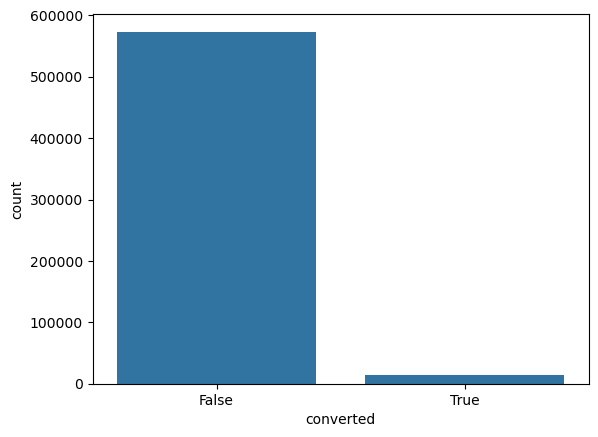

In [22]:
sns.countplot(x="converted", data=df);

In [18]:
chi2_contingency(tabla_cont)

Chi2ContingencyResult(statistic=54.005823883685245, pvalue=1.9989623063390078e-13, dof=1, expected_freq=array([[550327.71899045,  14249.28100955],
       [ 22930.28100955,    593.71899045]]))

In [19]:
_, p_value, _, _ = chi2_contingency(tabla_cont)
print(p_value)

1.9989623063390078e-13


In [23]:
df.groupby("test group")["converted"].mean()

test group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64

In [25]:
p_value < 0.05

True

Si el valor p es menor que un umbral predefinido (por ejemplo, 0.05), rechazamos la hipótesis nula y concluimos que hay una diferencia significativa en las tasas de conversión entre los grupos.

Si el valor p es mayor que el umbral, no podemos rechazar la hipótesis nula y concluimos que no hay evidencia suficiente para afirmar que hay una diferencia significativa.

In [ ]:
# Después de realizar las pruebas de A/B testign podemos decir que si existe una diferencia significativa entre los dos grupos.